# 使用类别3，8样本训练KNN以及logistic回归模型

In [11]:
from task1 import load_data,dataSplit
import numpy as np

处理数据集

In [12]:
data, fea, gnd = load_data()
def select_data_for_classes(fea, gnd, classes=[3, 8]):
    # 选择类别为3和8的样本索引
    indices = np.where(np.isin(gnd, classes))[0]
    fea_selected = fea[indices]
    gnd_selected = gnd[indices]
    return fea_selected, gnd_selected
fea_selected, gnd_selected = select_data_for_classes(fea, gnd)

模型的训练以及评估

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# kNN与逻辑斯蒂回归评估函数
def evaluate_models(fea_selected, gnd_selected, ntr_values=[5, 6, 7, 8]):
    kNN_accuracies = []
    logreg_accuracies = []
    
    for ntr in ntr_values:
        # 划分训练集与测试集
        trainData, trainGnd, testData, testGnd = dataSplit(fea_selected, gnd_selected, ntr)
    
        # kNN模型训练
        knn = KNeighborsClassifier(n_neighbors=2)
        knn.fit(trainData, trainGnd)
        knn_pred = knn.predict(testData)
        knn_accuracy = accuracy_score(testGnd, knn_pred)
        kNN_accuracies.append(knn_accuracy)
        
        # 逻辑斯蒂回归模型训练
        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(trainData, trainGnd)
        logreg_pred = logreg.predict(testData)
        logreg_accuracy = accuracy_score(testGnd, logreg_pred)
        logreg_accuracies.append(logreg_accuracy)
    
    return kNN_accuracies, logreg_accuracies

结果显示

d:\python\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\python\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

   ntr  kNN Accuracy  Logistic Regression Accuracy
0    5         0.800                         1.000
1    6         0.875                         0.875
2    7         1.000                         1.000
3    8         0.750                         0.750


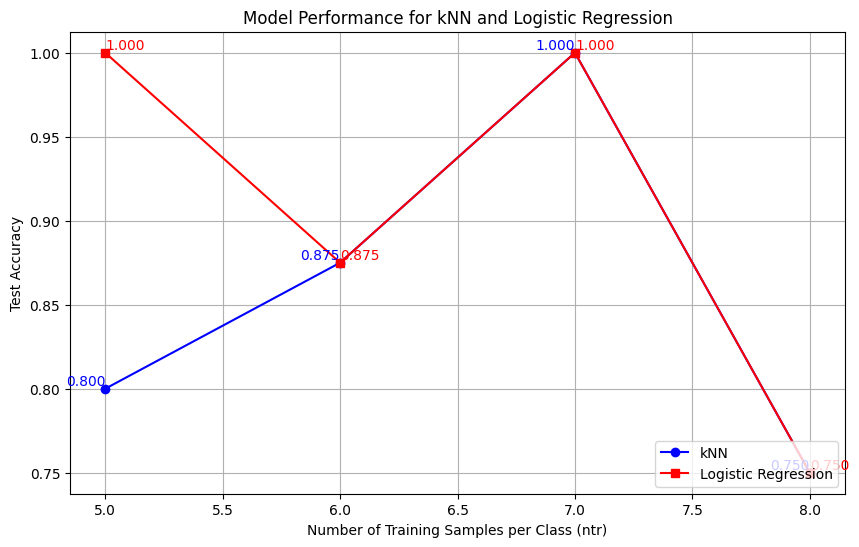

In [14]:
import pandas as pd
ntr_values = [5, 6, 7, 8]
kNN_accuracies, logreg_accuracies = evaluate_models(fea_selected, gnd_selected, ntr_values)

# 创建表格
accuracy_df = pd.DataFrame({
    "ntr": ntr_values,
    "kNN Accuracy": kNN_accuracies,
    "Logistic Regression Accuracy": logreg_accuracies
})
print(accuracy_df)

plt.figure(figsize=(10, 6))

# 绘制 kNN 曲线
plt.plot(ntr_values, kNN_accuracies, label="kNN", marker='o', linestyle='-', color='b')
for x, y in zip(ntr_values, kNN_accuracies):
    plt.text(x, y, f'{y:.3f}', ha='right', va='bottom', color='b')

# 绘制 Logistic Regression 曲线
plt.plot(ntr_values, logreg_accuracies, label="Logistic Regression", marker='s', linestyle='-', color='r')
for x, y in zip(ntr_values, logreg_accuracies):
    plt.text(x, y, f'{y:.3f}', ha='left', va='bottom', color='r')

plt.xlabel("Number of Training Samples per Class (ntr)")
plt.ylabel("Test Accuracy")
plt.title("Model Performance for kNN and Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


